In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create datasets
#samples
buff = open('train-images-idx3-ubyte','rb')
magic_number = int.from_bytes(buff.read(4), byteorder='big')
N = int.from_bytes(buff.read(4), byteorder='big')
n_row = int.from_bytes(buff.read(4), byteorder='big')
n_col = int.from_bytes(buff.read(4), byteorder='big')
X = np.matrix(np.frombuffer(buff.read(), dtype='uint8').reshape(N,-1), dtype='float')/255
buff.close()
#labels
buff = open('train-labels-idx1-ubyte','rb')
magic_number = int.from_bytes(buff.read(4), byteorder='big')
Nl = int.from_bytes(buff.read(4), byteorder='big')
L = np.array(np.frombuffer(buff.read(), dtype='uint8').reshape(-1), dtype=np.int)
### Take only 6000 with random
choice = np.random.choice(60000,6000)
X = X[choice]
L = L[choice]

In [3]:
X = X - X.mean(0)
eig_val, W = np.linalg.eig(X.T@X)
idx = [(-l.real, i) for i,l in enumerate(eig_val)]
idx.sort()
sorted_idx = [j for _,j in idx]
W = W[:,sorted_idx].real
eig_val = eig_val[sorted_idx].real

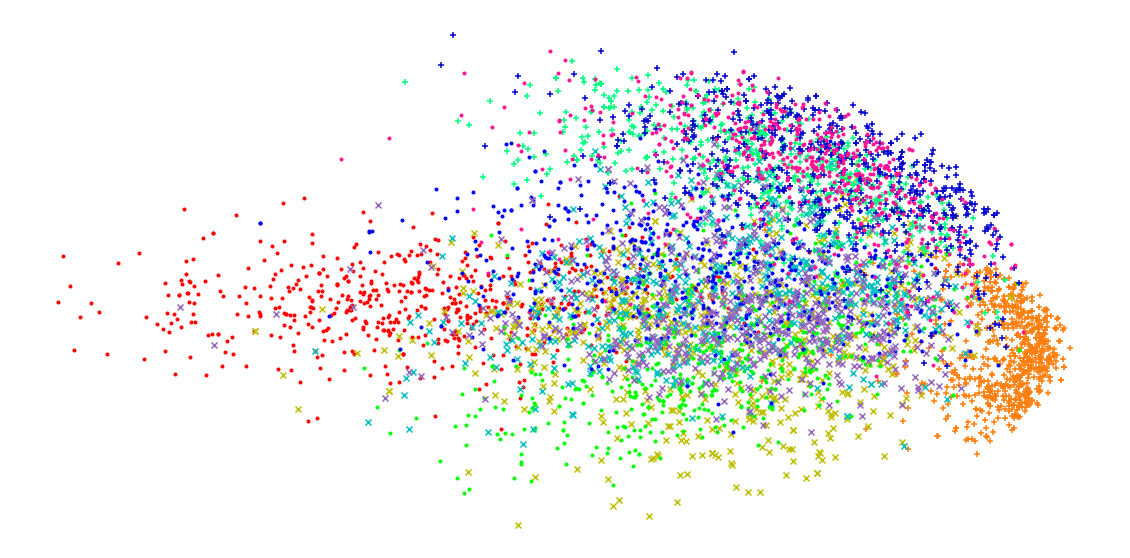

In [4]:
F = X@W[:,0:2]
f1 = np.array(F[:,0])
f2 = np.array(F[:,1])
fig, ax = plt.subplots(1, figsize=(20,10))
colors = ['r', 'tab:orange', 'y', 'lime', 'springgreen', 'c','b','mediumblue','tab:purple','deeppink']
markers = ['.','+','x','.','+','x','.','+', 'x','.']
for i, (c, m) in enumerate(zip(colors, markers)):
    ax.scatter(f1[L==i],f2[L==i], c=c, marker=m, label=str(i))
ax.axis('off')
plt.savefig('../slides/pic/PCA.png', tranparent=True)